# A Look at the gTEX RNA-Seq Dataset

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
df = pd.read_table('SraRunTable.txt', sep='\t')

In [6]:
df.head()

,Assay_Type_s,AssemblyName_s,BioSample_s,Center_Name_s,Experiment_s,InsertSize_l,LibraryLayout_s,LibrarySelection_s,LibrarySource_s,Library_Name_s,...,Platform_s,SRA_Study_s,g1k_analysis_group_s,g1k_pop_code_s,gap_accession_s,gap_consent_code_s,source_s,study_design_s,study_name_s,submitter_handle_s
0,RNA-Seq,<not provided>,SAMN03877663,THE BROAD INSTITUTE,SRX1124993,0,PAIRED,PCR,TRANSCRIPTOMIC,<not provided>,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
1,RNA-Seq,<not provided>,SAMN03877676,THE BROAD INSTITUTE,SRX1124994,0,PAIRED,PCR,TRANSCRIPTOMIC,<not provided>,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
2,RNA-Seq,<not provided>,SAMN03877803,THE BROAD INSTITUTE,SRX1124995,0,PAIRED,PCR,TRANSCRIPTOMIC,<not provided>,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
3,RNA-Seq,<not provided>,SAMN03878238,THE BROAD INSTITUTE,SRX1124996,0,PAIRED,PCR,TRANSCRIPTOMIC,<not provided>,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx
4,RNA-Seq,<not provided>,SAMN03877587,THE BROAD INSTITUTE,SRX1124997,0,PAIRED,PCR,TRANSCRIPTOMIC,<not provided>,...,ILLUMINA,SRP012682,<not provided>,<not provided>,phs000424,1,<not provided>,Cross-Sectional,Genotype-Tissue Expression (GTEx),GTEx


In [6]:
print '\n'.join(df.columns)

Assay_Type_s
AssemblyName_s
BioSample_s
Center_Name_s
Experiment_s
InsertSize_l
LibraryLayout_s
LibrarySelection_s
LibrarySource_s
Library_Name_s
LoadDate_s
MBases_l
MBytes_l
ReleaseDate_s
Run_s
SRA_Sample_s
Sample_Name_s
analyte_type_s
body_site_s
gap_sample_id_s
gap_subject_id_s
histological_type_s
is_tumor_s
molecular_data_type_s
sex_s
submitted_sample_id_s
submitted_subject_id_s
BioProject_s
Consent_s
Organism_s
Platform_s
SRA_Study_s
g1k_analysis_group_s
g1k_pop_code_s
gap_accession_s
gap_consent_code_s
source_s
study_design_s
study_name_s
submitter_handle_s


In [4]:
df = df[['BioSample_s', 'LibraryLayout_s', 'MBytes_l', 'Run_s', 'Sample_Name_s', 'sex_s', 'body_site_s', 'Platform_s']]

In [8]:
df['body_site_s'].unique()

array(['Thyroid', 'Testis', 'Skin - Sun Exposed (Lower leg)',
       'Adrenal Gland', 'Pancreas', 'Heart - Left Ventricle',
       'Artery - Aorta', 'Lung', 'Esophagus - Muscularis',
       'Esophagus - Mucosa', 'Stomach', 'Colon - Transverse',
       'Colon - Sigmoid', 'Prostate', 'Breast - Mammary Tissue',
       'Skin - Not Sun Exposed (Suprapubic)', 'Spleen',
       'Muscle - Skeletal', 'Liver', 'Ovary', 'Bladder', 'Uterus',
       'Brain - Frontal Cortex (BA9)', 'Brain - Cerebellar Hemisphere',
       'Brain - Hippocampus', 'Brain - Substantia nigra',
       'Brain - Anterior cingulate cortex (BA24)', 'Brain - Amygdala',
       'Brain - Caudate (basal ganglia)',
       'Brain - Nucleus accumbens (basal ganglia)',
       'Brain - Putamen (basal ganglia)', 'Artery - Coronary',
       'Kidney - Cortex', 'Brain - Cerebellum', 'Brain - Cortex',
       'Pituitary', 'Heart - Atrial Appendage',
       'Small Intestine - Terminal Ileum', 'Vagina',
       'Minor Salivary Gland', 'Esophagus 

In [5]:
df.head()

,BioSample_s,LibraryLayout_s,MBytes_l,Run_s,Sample_Name_s,sex_s,body_site_s,Platform_s
0,SAMN03877663,PAIRED,67,SRR2135283,GTEX-SUCS-0226-SM-5CHQG_rep1,male,Thyroid,ILLUMINA
1,SAMN03877676,PAIRED,51,SRR2135284,GTEX-SUCS-0226-SM-5CHQG_rep2,male,Thyroid,ILLUMINA
2,SAMN03877803,PAIRED,36,SRR2135285,GTEX-SUCS-1326-SM-5CHQI_rep1,male,Testis,ILLUMINA
3,SAMN03878238,PAIRED,47,SRR2135286,GTEX-WEY5-1826-SM-5CHRT_rep2,female,Skin - Sun Exposed (Lower leg),ILLUMINA
4,SAMN03877587,PAIRED,55,SRR2135287,GTEX-WFG8-0126-SM-5CHTB_rep1,male,Adrenal Gland,ILLUMINA


In [6]:
print('Number of samples: %i' % len(df))
print('Min: %.2fGB' % min(df['MBytes_l'] / 1024))
print('Max: %.2fGB' % max(df['MBytes_l'] / 1024))
print('Avg: %.2fGB' % np.mean(df['MBytes_l'] / 1024))
print('Total: %.2fGB or %.2fTB' % (sum(df['MBytes_l'] / 1024), sum(df['MBytes_l'] / 1024 / 1024)))

Number of samples: 9795
Min: 0.00GB
Max: 27.00GB
Avg: 3.28GB
Total: 32142.19GB or 31.39TB


(0, 30)

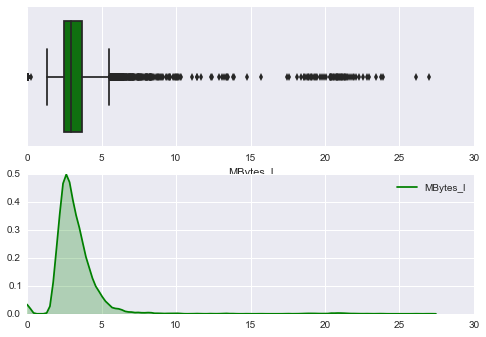

In [7]:
f, (ax1, ax2) = plt.subplots(2)
sns.boxplot(df['MBytes_l'] / 1024, ax=ax1, color='g')
sns.kdeplot(df['MBytes_l'] / 1024, ax=ax2, shade=True, color='g')
plt.xlim([0,30])

How many of these samples are Single versus Paired? The difference will change how we acquire the data from dbGaP.

In [8]:
df.groupby('LibraryLayout_s').size()

LibraryLayout_s
PAIRED    9777
SINGLE      18
dtype: int64

In [9]:
singles = df[df.LibraryLayout_s == 'SINGLE']
singles

,BioSample_s,LibraryLayout_s,MBytes_l,Run_s,Sample_Name_s,sex_s,body_site_s,Platform_s
206,SAMN00992539,SINGLE,6966,SRR599025,GTEX-QMRM-0526-SM-2I5GA,male,Heart - Left Ventricle,ILLUMINA
228,SAMN00992965,SINGLE,5778,SRR599086,GTEX-PSDG-0926-SM-2I5FP,male,Heart - Left Ventricle,ILLUMINA
236,SAMN00992461,SINGLE,5111,SRR599281,GTEX-OXRO-0006-SM-2I5EM,female,Whole Blood,ILLUMINA
243,SAMN00992769,SINGLE,6916,SRR599380,GTEX-QLQ7-0526-SM-2I5G3,male,Heart - Left Ventricle,ILLUMINA
245,SAMN00992450,SINGLE,5207,SRR598894,GTEX-OHPN-0011-R7A-SM-2I5FI,female,Brain - Putamen (basal ganglia),ILLUMINA
251,SAMN00992478,SINGLE,11678,SRR599510,GTEX-OHPN-0011-R10A-SM-2I5FL,female,Brain - Frontal Cortex (BA9),ILLUMINA
261,SAMN00992437,SINGLE,13427,SRR600493,GTEX-PSDG-0226-SM-2I5FR,male,Skin - Sun Exposed (Lower leg),ILLUMINA
264,SAMN00992970,SINGLE,5930,SRR600656,GTEX-QEG5-0426-SM-2I5GJ,male,Muscle - Skeletal,ILLUMINA
269,SAMN00992778,SINGLE,6506,SRR607219,GTEX-OIZF-0006-SM-2I5GQ,male,Whole Blood,ILLUMINA
311,SAMN00993116,SINGLE,5785,SRR602217,GTEX-QESD-0006-SM-2I5G6,male,Whole Blood,ILLUMINA


Ensure there are no duplicates

In [10]:
len(df.Sample_Name_s.unique()) == len(df.BioSample_s.unique()) == len(df.Run_s.unique())

True

Save the Run accession values in a file to make transferring easier

In [11]:
paired = df[(df.LibraryLayout_s == 'PAIRED') & (df.MBytes_l > 50)]

In [12]:
print('Number of samples: %i' % len(paired))
print('Min: %.2fGB' % min(paired['MBytes_l'] / 1024))
print('Max: %.2fGB' % max(paired['MBytes_l'] / 1024))
print('Avg: %.2fGB' % np.mean(paired['MBytes_l'] / 1024))
print('Total: %.2fGB or %.2fTB' % (sum(paired['MBytes_l'] / 1024), sum(paired['MBytes_l'] / 1024 / 1024)))

Number of samples: 9672
Min: 0.05GB
Max: 27.00GB
Avg: 3.31GB
Total: 32027.99GB or 31.28TB


In [13]:
with open('gTEX_paired_ids.txt', 'w') as f:
    for run in paired.Run_s:
        f.write(run  + '\n')

Determine Diff between gtex-data bucket and run SRRs

In [14]:
import boto
conn = boto.connect_s3()
bucket = conn.get_bucket('gtex-data')
keys = [str(x.name).split('.')[0] for x in bucket.list()]

In [15]:
filtered = paired.drop(df[df.Run_s.isin(keys)].index)

In [16]:
with open('gTEX_paired_ids.txt', 'w') as f:
    for run in filtered.Run_s:
        f.write(run  + '\n')